<a href="https://colab.research.google.com/github/Andyfer004/LAB-09/blob/main/LAB9IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 8 - Inteligencia Artificial

 ## Catedrático: Alberto Suriano

    ### Estudiantes:
    - Andy Fuentes 22944
    - Davis Roldán  22672
    - Diederich Solís 22952
    

## Tasks 1 - Teoría

### 1. Diferencia entre Modelos de Markov y Hidden Markov Models

Los Modelos de Markov y los Modelos Ocultos de Markov (Hidden Markov Models, HMM) están relacionados, pero su principal diferencia es que el Modelo de Markov clásico describe un proceso donde los estados del sistema son observables directamente y la probabilidad de pasar de un estado a otro depende únicamente del estado actual (no del historial pasado). En cambio, en un HMM, los estados verdaderos del sistema no son observables de manera directa; en su lugar, se observan señales o datos que dependen de esos estados ocultos. Es decir, los HMM introducen una capa de incertidumbre adicional, porque además de modelar transiciones entre estados, también modelan cómo se generan observaciones a partir de esos estados ocultos.

### 2. ¿Qué son los factorial HMM (Hidden Markov Models)?

Los Factorial Hidden Markov Models (FHMM) son una extensión de los HMM tradicionales. En un FHMM, en lugar de tener una sola cadena de estados ocultos que genera observaciones, se tienen múltiples cadenas ocultas independientes entre sí que actúan de manera conjunta para generar una única observación. Cada cadena sigue su propio proceso de Markov, pero la observación final depende de la combinación de los estados de todas las cadenas en ese momento. Esta estructura permite modelar sistemas más complejos y ricos, donde una sola cadena de estados sería insuficiente para capturar toda la dinámica del sistema.

### 3. Algoritmo Forward-Backward para HMM

El algoritmo Forward-Backward es un método eficiente utilizado en HMMs para calcular la probabilidad de una secuencia observada, así como para inferir la probabilidad de estar en un estado específico en un momento dado. El algoritmo tiene dos fases principales: la fase Forward, donde se recorre la secuencia de observaciones desde el inicio hacia el final acumulando las probabilidades de llegar a cada estado, y la fase Backward, donde se recorre la secuencia en sentido inverso, desde el final hacia el inicio, acumulando las probabilidades futuras desde cada estado. Finalmente, combinando ambas fases se pueden obtener las probabilidades posteriores de los estados dados los datos observados.

### 4. ¿Por qué es necesario el paso Backward en el algoritmo Forward-Backward?

El paso Backward es necesario porque en un HMM no basta con saber la probabilidad de haber llegado a un estado en el tiempo actual; también importa considerar la probabilidad de lo que falta por observar a partir de ese estado. Sin el paso Backward, sólo tendríamos información de cómo llegamos hasta un estado, pero no podríamos evaluar qué tan probable es que a partir de ese estado se generen las observaciones siguientes. Por ejemplo, supongamos que estamos analizando el comportamiento del clima, y hasta hoy el modelo sugiere que es muy probable que esté nublado. Sin embargo, si sabemos que en los próximos días hay observaciones que indican sol constante, necesitamos considerar que algunos estados "nublados" en el presente serían inconsistentes con la secuencia futura. El paso Backward nos ayuda a integrar esta información del futuro y ajustar nuestras inferencias de los estados ocultos de manera más precisa.

# Task 2: Algoritmo Forward–Backward en HMM

Implementaremos el algoritmo Forward–Backward para un modelo meteorológico basado en un HMM de dos estados: **Sunny** y **Rainy**.

## Subtask 2.1: Definir parámetros del HMM

In [1]:
states = ['Sunny', 'Rainy']
observations = ['Sunny', 'Rainy']
initial_prob = { 'Sunny': 0.5, 'Rainy': 0.5 }
transition_prob = {
    'Sunny': { 'Sunny': 0.8, 'Rainy': 0.2 },
    'Rainy': { 'Sunny': 0.4, 'Rainy': 0.6 }
}
emission_prob = {
    'Sunny': { 'Sunny': 0.8, 'Rainy': 0.2 },
    'Rainy': { 'Sunny': 0.3, 'Rainy': 0.7 }
}

##Subtask 2.2: Crear la clase HMM

In [2]:
class HMM:
    def __init__(self, states, observations, initial_prob, transition_prob, emission_prob):
        self.states = states
        self.observations = observations
        self.initial_prob = initial_prob
        self.transition_prob = transition_prob
        self.emission_prob = emission_prob

    def generate_sequence(self, length):
        import random
        sequence = []
        state = random.choices(self.states, weights=[self.initial_prob[s] for s in self.states])[0]
        for _ in range(length):
            obs = random.choices(self.observations, weights=[self.emission_prob[state][o] for o in self.observations])[0]
            sequence.append(obs)
            state = random.choices(self.states, weights=[self.transition_prob[state][s] for s in self.states])[0]
        return sequence

    def forward(self, observations):
        fwd = [{}]
        for s in self.states:
            fwd[0][s] = self.initial_prob[s] * self.emission_prob[s][observations[0]]
        for t in range(1, len(observations)):
            fwd.append({})
            for s in self.states:
                fwd[t][s] = sum(fwd[t-1][s_prev] * self.transition_prob[s_prev][s] for s_prev in self.states) * self.emission_prob[s][observations[t]]
        return fwd

    def backward(self, observations):
        bwd = [{} for _ in range(len(observations))]
        for s in self.states:
            bwd[-1][s] = 1
        for t in reversed(range(len(observations) - 1)):
            for s in self.states:
                bwd[t][s] = sum(self.transition_prob[s][s_next] * self.emission_prob[s_next][observations[t+1]] * bwd[t+1][s_next] for s_next in self.states)
        return bwd

    def compute_state_probabilities(self, observations):
        fwd = self.forward(observations)
        bwd = self.backward(observations)
        state_probs = []
        for t in range(len(observations)):
            total = sum(fwd[t][s] * bwd[t][s] for s in self.states)
            probs = {s: (fwd[t][s] * bwd[t][s]) / total for s in self.states}
            state_probs.append(probs)
        return state_probs

##Subtask 2.3: Crear una instancia del HMM

In [3]:
hmm = HMM(states, observations, initial_prob, transition_prob, emission_prob)

##Subtask 2.4: Generar una secuencia de observaciones

In [4]:
obs_sequence = hmm.generate_sequence(5)
print("Secuencia generada:", obs_sequence)

Secuencia generada: ['Rainy', 'Rainy', 'Sunny', 'Sunny', 'Rainy']


##Subtask 2.5: Calcular las probabilidades Forward

In [5]:
forward_probs = hmm.forward(obs_sequence)
print("\nProbabilidades Forward:")
print(forward_probs)


Probabilidades Forward:
[{'Sunny': 0.1, 'Rainy': 0.35}, {'Sunny': 0.044000000000000004, 'Rainy': 0.16099999999999998}, {'Sunny': 0.07968, 'Rainy': 0.031619999999999995}, {'Sunny': 0.06111360000000002, 'Rainy': 0.010472399999999998}, {'Sunny': 0.010615968000000003, 'Rainy': 0.012954312000000003}]


##Subtask 2.6: Calcular las probabilidades Backward

In [6]:
backward_probs = hmm.backward(obs_sequence)
print("\nProbabilidades Backward:")
print(backward_probs)


Probabilidades Backward:
[{'Sunny': 0.03915120000000002, 'Rainy': 0.056157600000000016}, {'Sunny': 0.15324000000000007, 'Rainy': 0.10452000000000003}, {'Sunny': 0.22200000000000006, 'Rainy': 0.18600000000000003}, {'Sunny': 0.30000000000000004, 'Rainy': 0.5}, {'Sunny': 1, 'Rainy': 1}]


##Subtask 2.7: Calcular las probabilidades de estado combinadas (Forward–Backward)

In [7]:
state_probs = hmm.compute_state_probabilities(obs_sequence)
print("\nProbabilidades de estado por instante:")
print(state_probs)


Probabilidades de estado por instante:
[{'Sunny': 0.1661040937994797, 'Rainy': 0.8338959062005203}, {'Sunny': 0.28606193901811955, 'Rainy': 0.7139380609818804}, {'Sunny': 0.7504772959846044, 'Rainy': 0.2495227040153956}, {'Sunny': 0.7778473569257558, 'Rainy': 0.2221526430742442}, {'Sunny': 0.45039634658561545, 'Rainy': 0.5496036534143846}]


## Subtask 2.8: Visualizar resultados con gráficas

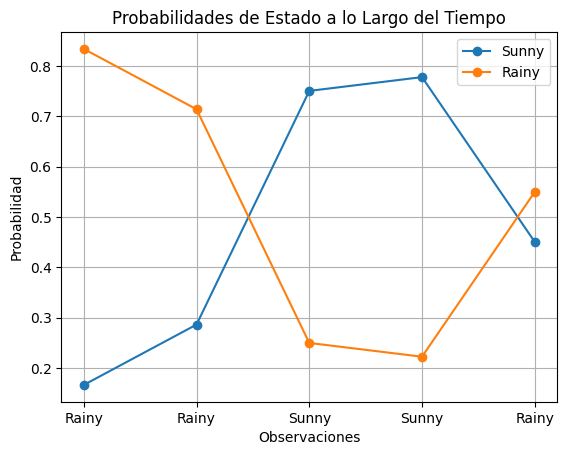

In [8]:
import matplotlib.pyplot as plt

# Graficar probabilidades de estado a lo largo del tiempo
def plot_state_probabilities(state_probs, obs_sequence):
    times = list(range(len(state_probs)))
    for state in state_probs[0].keys():
        probs = [sp[state] for sp in state_probs]
        plt.plot(times, probs, marker='o', label=state)

    plt.xticks(times, obs_sequence)
    plt.xlabel('Observaciones')
    plt.ylabel('Probabilidad')
    plt.title('Probabilidades de Estado a lo Largo del Tiempo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar
plot_state_probabilities(state_probs, obs_sequence)